In [29]:
import matplotlib.pyplot as plt
import numpy as np
import json
import pandas as pd
import sys
import os
#sys.path.append(os.path.join(os.path.dirname(__file__), ".."))

rooth_path = "/home/nomodel/code/NODS/results"

with open("/home/nomodel/code/NODS/network_configuration.json", "r") as json_file:
    net_config = json.load(json_file)

with_NO_color = net_config["devices"]["nNOS"]["color"][0]
without_NO_color = "#000000"

dfs = []
dfs_NO = []
weights_without = []
weights_with_NO = []

# Append the CSV files for df
for i in range(0, 10):
    df_read = pd.read_csv(f'/home/nomodel/code/NODS/results/grid_search/grid_complete_1/min4_plus8/5/pf-PC_-32017-0{i}.csv', sep = '\t')
    weights_without.append(df_read.iloc[:, 3].values)

for i in range(10, 24):
    df_read = pd.read_csv(f'/home/nomodel/code/NODS/results/grid_search/grid_complete_1/min4_plus8/5/pf-PC_-32017-{i}.csv', sep = '\t')
    weights_without.append(df_read.iloc[:, 3].values)

# Append the CSV files for df_NO
for i in range(0, 10):
    df_read = pd.read_csv(f'/home/nomodel/code/NODS/results/grid_search/grid_NO/min4_plus8/1/pf-PC_-176753-0{i}.csv', sep = '\t')
    weights_with_NO.append(df_read.iloc[:, 3].values)

for i in range(10, 24):
    df_read = pd.read_csv(f'/home/nomodel/code/NODS/results/grid_search/grid_NO/min4_plus8/1/pf-PC_-176753-{i}.csv', sep = '\t')
    weights_with_NO.append(df_read.iloc[:, 3].values)

weights_change = np.concatenate(weights_without, axis=0)
weights_change_NO = np.concatenate(weights_with_NO, axis=0)


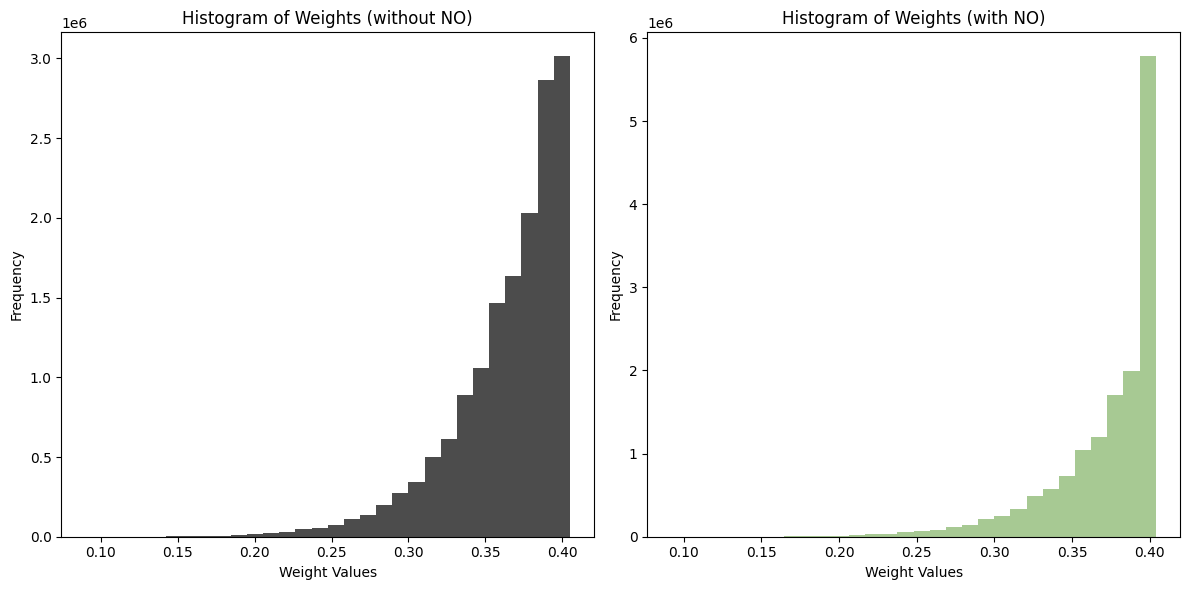

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram for weights_change
axs[0].hist(weights_change, bins=30, color=without_NO_color, alpha=0.7)
axs[0].set_title('Histogram of Weights (without NO)')
axs[0].set_xlabel('Weight Values')
axs[0].set_ylabel('Frequency')

# Plot histogram for weights_change_NO
axs[1].hist(weights_change_NO, bins=30, color=with_NO_color, alpha=0.7)
axs[1].set_title('Histogram of Weights (with NO)')
axs[1].set_xlabel('Weight Values')
axs[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()